# 3 Compare sims
This script compares observed and simulated outcomes for three population types (random, hybrid, and GREASYPOP). 

**Input files**
- `observed.csv`
- `greasypop.ppl`

**Output files**
- `random.sim`
- `hybrid.sim`
- `greasypop.sim`
- `sim_by_poptype_new_deaths.png`
- `sim_by_poptype_new_infections.png`

You will need a file called `observed.csv` in the format shown below. In this example, we will explore the first wave of the pandemic for Maryland, DC, and northern Virginia using the date range of 2020-02-01 to 2020-06-30. Here, we use case and death data from [Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series) for the same counties represented in our greasypop population. You can see how this data was processed in `process_observed.ipynb`. The important thing is to have the following column names in a file called `observed.csv`: 
- `cum_infections`
- `cum_deaths`
- `new_infections`
- `new_deaths`
  
[Covasim Tutorial 4 - People and Data](https://docs.idmod.org/projects/covasim/en/latest/tutorials/tut_people.html) provides more information on Covasim data requirements. 

In [1]:
# Import packages and set path
import covasim as cv
#cv.options(jupyter=True, verbose=0) # if you don't want to print cv output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sciris as sc
import os
from scipy.io import mmread

path = "/Users/hamilaj1/Desktop/Covasim-G/data"

Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


First, read in your observed data.

In [2]:
covid =  pd.read_csv(f'{path}/observed.csv') # Read in observed infections and deaths
covid.head() # Preview data

,date,cum_infections,cum_deaths,cum_diagnoses,new_diagnoses,new_infections,new_deaths
0,2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-03,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-04,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-05,0.0,0.0,0.0,0.0,0.0,0.0


Now we will set the parameters for each simulation using a dictionary that can be called later. We want the pop_size to be the same length as the number of people in our simulation. We'll start with 100 people initially infected and will use Covasim's default values for all other parameters. Parameters will be manually adjusted later in `04_calibration.ipynb`.

In [3]:
people = pd.read_csv(f'{path}/people_all.csv',low_memory=False) # Read in people_all.csv so we have its length

In [4]:
pars = dict(
    pop_size = len(people), # Total number of people in the GREASYPOP population
    pop_infected = 100, # Start with 100 people infected
    start_day = '2020-02-01', # Start day
    end_day   = '2020-06-30',) # End day

## 3.1 Sim with random pop_type
The first simulation `sim1` will use a random `pop_type`. Use the `datafile` argument in `cv.Sim` to load your observed data. 

In [5]:
sim1 = cv.Sim(pars, pop_type='random', datafile=f'{path}/observed.csv').initialize() # Initialize sim
sim1.run() # Run sim
# sim1.save(f'{path}/random.sim') # Save the sim so you can load it later (loading is faster than running)

Initializing sim with 9424031 people for 150 days
  Running 2020-02-01 ( 0/150) (0.00 s)  ———————————————————— 1%
  Running 2020-02-11 (10/150) (20.84 s)  •——————————————————— 7%
  Running 2020-02-21 (20/150) (44.45 s)  ••—————————————————— 14%
  Running 2020-03-02 (30/150) (68.89 s)  ••••———————————————— 21%
  Running 2020-03-12 (40/150) (93.48 s)  •••••——————————————— 27%
  Running 2020-03-22 (50/150) (118.38 s)  ••••••—————————————— 34%
  Running 2020-04-01 (60/150) (144.99 s)  ••••••••———————————— 40%
  Running 2020-04-11 (70/150) (175.51 s)  •••••••••——————————— 47%
  Running 2020-04-21 (80/150) (212.19 s)  ••••••••••—————————— 54%
  Running 2020-05-01 (90/150) (259.60 s)  ••••••••••••———————— 60%
  Running 2020-05-11 (100/150) (320.08 s)  •••••••••••••——————— 67%
  Running 2020-05-21 (110/150) (381.47 s)  ••••••••••••••—————— 74%
  Running 2020-05-31 (120/150) (434.41 s)  ••••••••••••••••———— 80%
  Running 2020-06-10 (130/150) (481.28 s)  •••••••••••••••••——— 87%
  Running 2020-0

Sim(<no label>; 2020-02-01 to 2020-06-30; pop: 9424031 random; epi: 1.00011e+07⚙, 53864☠)

You can see how the sim with the random pop_type compares to observed infections and deaths by running the lines below.

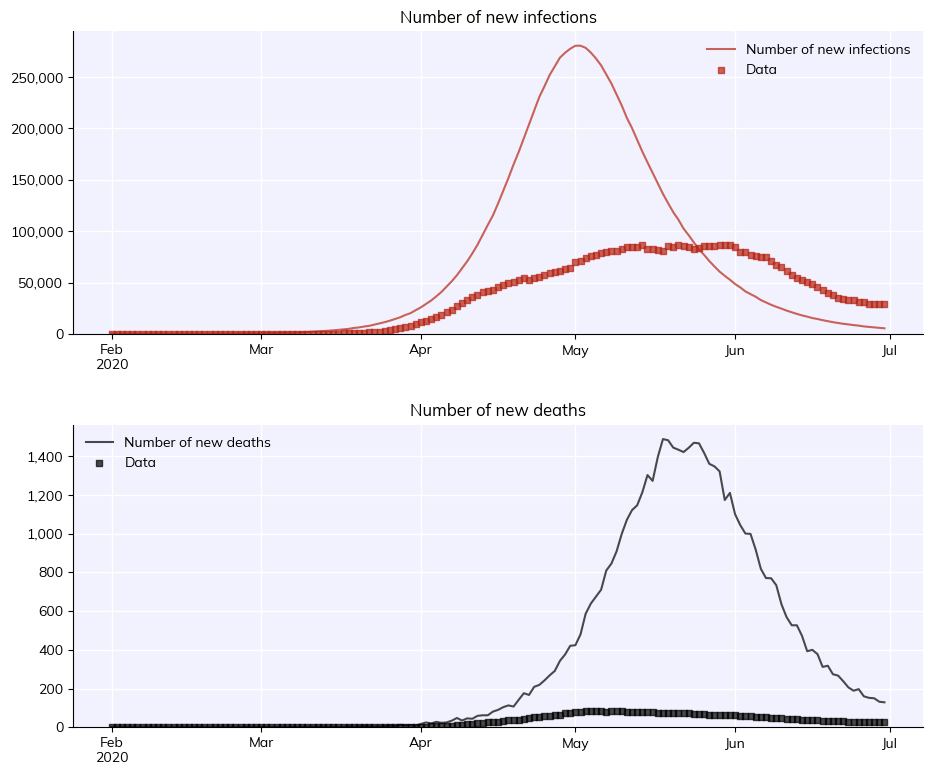

Figure(1000x800)


In [6]:
print(sim1.plot(to_plot=['new_infections','new_deaths']))

## 3.2 Sim with hybrid pop_type
`sim2` will use a hybrid pop_type. We will also plot infections and deaths compared to observed data.

Initializing sim with 9424031 people for 150 days
Loading location-specific data for "USA-Maryland"
  Running 2020-02-01 ( 0/150) (0.00 s)  ———————————————————— 1%
  Running 2020-02-11 (10/150) (30.85 s)  •——————————————————— 7%
  Running 2020-02-21 (20/150) (67.09 s)  ••—————————————————— 14%
  Running 2020-03-02 (30/150) (104.31 s)  ••••———————————————— 21%
  Running 2020-03-12 (40/150) (142.36 s)  •••••——————————————— 27%
  Running 2020-03-22 (50/150) (182.71 s)  ••••••—————————————— 34%
  Running 2020-04-01 (60/150) (225.38 s)  ••••••••———————————— 40%
  Running 2020-04-11 (70/150) (278.40 s)  •••••••••——————————— 47%
  Running 2020-04-21 (80/150) (337.20 s)  ••••••••••—————————— 54%
  Running 2020-05-01 (90/150) (414.30 s)  ••••••••••••———————— 60%
  Running 2020-05-11 (100/150) (508.24 s)  •••••••••••••——————— 67%
  Running 2020-05-21 (110/150) (600.72 s)  ••••••••••••••—————— 74%
  Running 2020-05-31 (120/150) (680.76 s)  ••••••••••••••••———— 80%
  Running 2020-06-10 (130/150) (

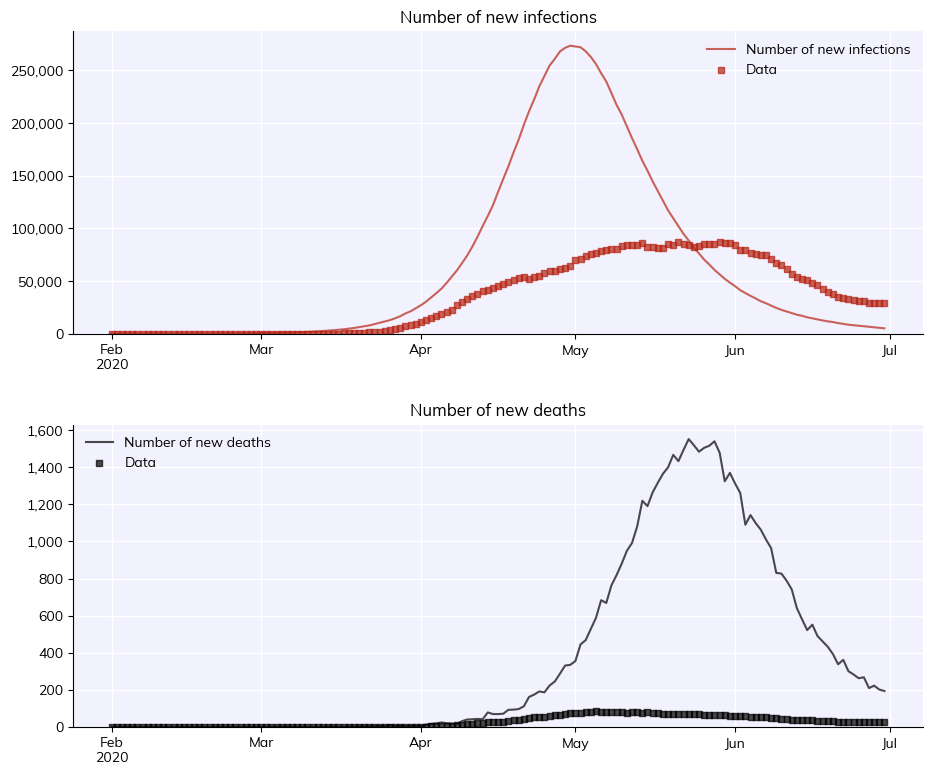

Figure(1000x800)


In [7]:
sim2 = cv.Sim(pars, pop_type='hybrid', location='USA-Maryland', datafile=f'{path}/observed.csv').initialize()
sim2.run()
sim2.save(f'{path}/hybrid.sim')
print(sim2.plot(to_plot=['new_infections','new_deaths']))

## 3.3 Sim with GREASYPOP population
For `sim3`, load in the `greasypop.ppl` file using the `popfile` argument.

Initializing sim with 9424031 people for 150 days
Loading population from /Users/hamilaj1/Desktop/Covasim-G/data/greasypop.ppl
  Running 2020-02-01 ( 0/150) (0.01 s)  ———————————————————— 1%
  Running 2020-02-11 (10/150) (20.14 s)  •——————————————————— 7%
  Running 2020-02-21 (20/150) (43.34 s)  ••—————————————————— 14%
  Running 2020-03-02 (30/150) (66.52 s)  ••••———————————————— 21%
  Running 2020-03-12 (40/150) (89.59 s)  •••••——————————————— 27%
  Running 2020-03-22 (50/150) (112.57 s)  ••••••—————————————— 34%
  Running 2020-04-01 (60/150) (135.57 s)  ••••••••———————————— 40%
  Running 2020-04-11 (70/150) (159.08 s)  •••••••••——————————— 47%
  Running 2020-04-21 (80/150) (182.92 s)  ••••••••••—————————— 54%
  Running 2020-05-01 (90/150) (206.82 s)  ••••••••••••———————— 60%
  Running 2020-05-11 (100/150) (230.73 s)  •••••••••••••——————— 67%
  Running 2020-05-21 (110/150) (255.34 s)  ••••••••••••••—————— 74%
  Running 2020-05-31 (120/150) (280.20 s)  ••••••••••••••••———— 80%
  Runni

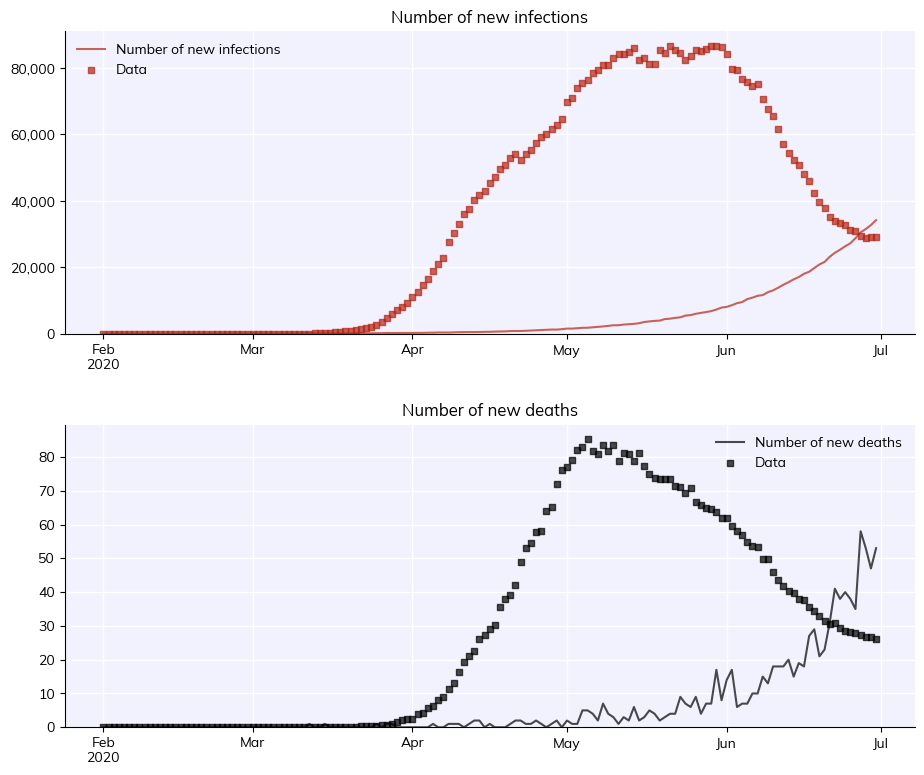

Figure(1000x800)


In [8]:
# greasypop pop
sim3 = cv.Sim(pars, popfile=f'{path}/greasypop.ppl', datafile=f'{path}/observed.csv').initialize() # Initialize sim
sim3.run() # Run sim
sim3.save(f'{path}/greasypop.sim') # Save sim for loading later
print(sim3.plot(to_plot=['new_infections','new_deaths'])) # Plot new_infections and new_deaths

### 3.3.1 Cross checking
Let's make sure the uid's used by Covasim correspond to the uid's in the GREASYPOP population by using the `.story(uid)` function and comparing the output to the uid in `people_all.csv`. Below, you'll see that the person with uid  100  is indeed a 53 year old male in both the sim `People` object and `people_all.csv`. 

You may also notice that the school grade for person 100 is 'c' but they are not in the school contact layer. In GREASYPOP school grades, 'c' stands for college; however, college students are not in the school layer. This is because the NCES data used to generate school contacts only has k-12 schools. College dorms are in the Census data though, so these people do contact each other in the groupquarters "g" layer if they live in a dorm. If they are 'college commuters' (i.e. people who live at home and commute into college), they are not in the groupquarters layer either. As person 100 is 53 years old, they are likely a college commuter; therefore, they do not have any contacts in the school or "g" layers as noted by `cv.story(uid)`. Age 53 may seem a bit old for college, but this is still reasonable and likely representative of the PUMS samples. See the [GREASYPOP manuscript](https://arxiv.org/abs/2406.14698) to learn more about how agent attributes and contacts are generated from various data sources including NCES, PUMS, and the Census.

In [9]:
print(sim3.people.story(100))


This is the story of 100, a 53 year old male, who did not contract COVID.
100 is connected to 4 people in the household layer
100 is connected to 6 people in the workplace layer
100 is connected to 3 people in the community layer
100 has no contacts in the school, "g" layer(s)
100 has 13 contacts in total
Nothing happened to 100 during the simulation.
None


In [10]:
people.loc[people['uid']==100]

,Unnamed: 0,p_id,hh_id,cbg_id,uid,sample_index,age,female,working,commuter,commuter_income_category,commuter_workplace_category,race_black_alone,white_non_hispanic,hispanic,sch_grade,sex,cbg_geocode,state,county
100,100,1,229,3186,100,2509092.0,53.0,0.0,1.0,1.0,2.0,9.0,0.0,1.0,0.0,c,1.0,2.402175e+11,24,24021


## 3.4 Plot deaths by population type
Now that you've saved all the sims, you can also load them the next time. Loading doesn't take as long as running.

In [11]:
sim1 = cv.load(f'{path}/random.sim')
sim2 = cv.load(f'{path}/hybrid.sim')
sim3 = cv.load(f'{path}/greasypop.sim')

Finally, plot the data from each sim as well as observed data.

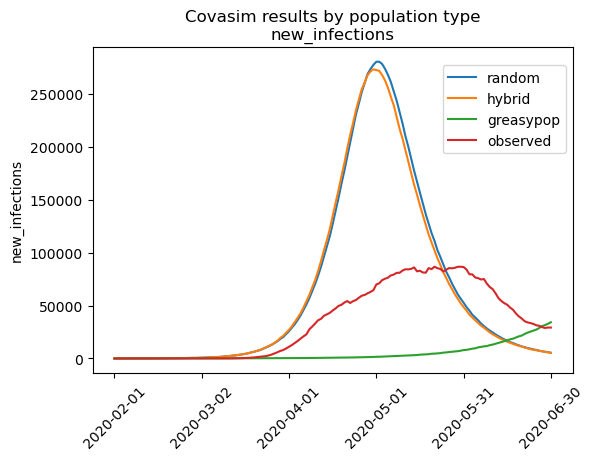

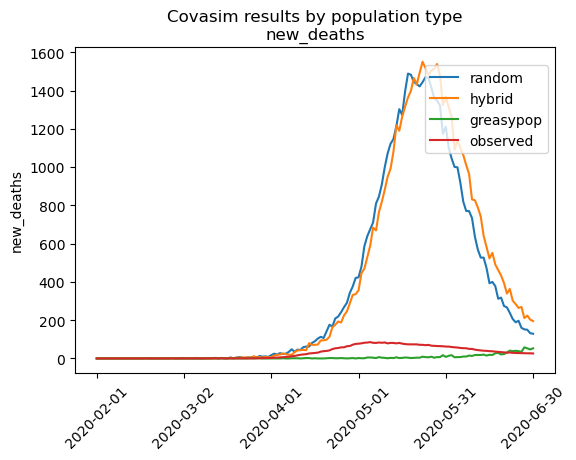

In [12]:
outcomes = ['new_infections','new_deaths']
for outcome in outcomes:
    plt.plot(sim1.results['date'], sim1.results[outcome].values, label='random')
    plt.plot(sim2.results['date'], sim2.results[outcome].values, label='hybrid')
    plt.plot(sim3.results['date'], sim3.results[outcome].values, label='greasypop')
    plt.plot(sim1.results['date'], covid[outcome].to_numpy(), label='observed')
    plt.xticks(covid['date'][::30],  rotation=45)
    plt.title(f'Covasim results by population type\n{outcome}')
    plt.ylabel(outcome)
    plt.subplots_adjust(bottom=0.2,left=0.15)
    plt.gcf().legend(loc='right',bbox_to_anchor=(0.9, 0.75))
    plt.savefig(f'{path}/sim_by_poptype_{outcome}.png')
    plt.show()